# Healthy Habits classification #

## This project leverages unsupervised machine learning techniques to cluster people based on health habits. The goal is to identify patterns in the data that group people into meaningful clusters, with a particular focus on isolating the cluster representing the unhealthy habits ##

![image](https://cdn.shopify.com/s/files/1/0606/7313/0669/files/WhatsApp_Image_2023-04-25_at_18.42.49_1_480x480.jpg?v=1682431230)

### *Importing the required libraries* ###


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
import scipy

import warnings
warnings.filterwarnings('ignore')

### *Importing the dataset* ###


In [2]:
df = pd.read_csv(r"E:\Jupyter\Datasets\ObesityDataSet.csv")

In [3]:
df.sample()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
946,Male,19.637203,1.814182,85.301029,yes,yes,2.923916,3.335876,Sometimes,no,2.372444,no,1.305633,0.311436,Sometimes,Public_Transportation,Overweight_Level_I


In [4]:
df = df.rename({"FAVC": "High_caloric_food", 
           "FCVC": "vegetables_frequency", 
           "NCP": "main_meals", 
           "CAEC" : "food_between_meals",
           "CH2O": "water_consumption",
           "SCC" : "calorie_monitoring",
           "FAF" : "exercise_frequency",
           "TUE" : "screen_time",
           "CALC" : "alcohol_consumption"}, axis="columns")

### **Feature Description** ###

##### **Gender** #####
##### *This column indicates the gender of the individual, typically categorized as male or female.* #####

##### **Age** #####
##### *This column records the age of the individual in years.* #####

##### **Height** ##### 
##### *This column represents the height of the individual, usually measured in centimeters (cm) or meters (m).* #####

##### **Weight** #####
##### *This column indicates the weight of the individual, typically measured in kilograms (kg).* #####

##### **family_history_with_overweight** #####
##### *This column indicates whether any family members have suffered from or currently suffer from overweight issues.* #####

##### **High_caloric_food** #####
##### *This column assesses whether the individual frequently consumes high-calorie foods.* #####

##### **vegetables_frequency** #####
##### *This column measures how often the individual consumes vegetables.* #####

##### **main_meals** #####
##### *This column records the number of main meals consumed by the individual per day.* #####

##### **food_between_meals** #####
##### *This column indicates whether the individual consumes food between main meals (snacking).* #####

##### **SMOKE** #####
##### *This column indicates whether the individual is a smoker or non-smoker.* #####

##### **water_consumption** #####
##### *This column measures the daily water intake of the individual, typically expressed in liters or milliliters.* #####

##### **calorie_monitoring** #####
##### *This column indicates whether the individual actively monitors their calorie consumption.* #####

##### **exercise_frequency** #####
##### *This column measures how often the individual engages in physical activity or exercise.* #####

##### **screen_time** #####
##### *This column records the amount of time spent using technology devices, such as computers, smartphones, or tablets.* #####

##### **alcohol_consumption** #####
##### *This column indicates the level of alcohol consumption by the individual.* #####

##### **MTRANS** (Transportation used) #####
##### *This column categorizes the mode of transportation used by the individual (e.g., walking, cycling, public transport, private vehicle).* #####

##### **NObeyesdad** (Obesity level deducted) #####
##### *This column represents the obesity level determined based on various factors such as BMI, dietary habits, physical activity, etc.* #####

### **Exploratory Data Analysis (EDA)** ###

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   High_caloric_food               2111 non-null   object 
 6   vegetables_frequency            2111 non-null   float64
 7   main_meals                      2111 non-null   float64
 8   food_between_meals              2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  water_consumption               2111 non-null   float64
 11  calorie_monitoring              2111 non-null   object 
 12  exercise_frequency              21

In [6]:
df.shape

(2111, 17)

In [7]:
df.isna().sum().sum(), df.duplicated().sum()

(np.int64(0), np.int64(24))

In [8]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [9]:
df.shape

(2087, 17)

In [34]:
details = pd.DataFrame({"unique_values": df.nunique(), "Data_type" :df.dtypes}).sort_values(by="unique_values").reset_index(names="Features")

for i in details.index:
    if details.loc[i,"unique_values"] == 2 and details.loc[i,"Data_type"] == "object":
        details.loc[i,"preprocessing"] = "dummy"
    elif details.loc[i,"unique_values"] > 2 and details.loc[i,"Data_type"] == "object":
        details.loc[i,"preprocessing"] = "map/one-hot-encod"  
    else:
        details.loc[i,"preprocessing"] = "scale"      
        
details        

,Features,unique_values,Data_type,preprocessing
0,Gender,2,object,dummy
1,family_history_with_overweight,2,object,dummy
2,High_caloric_food,2,object,dummy
3,SMOKE,2,object,dummy
4,calorie_monitoring,2,object,dummy
5,food_between_meals,4,object,map/one-hot-encod
6,alcohol_consumption,4,object,map/one-hot-encod
7,MTRANS,5,object,map/one-hot-encod
8,NObeyesdad,7,object,map/one-hot-encod
9,main_meals,635,float64,scale


### **Data Visualization** ###

In [11]:
categorical_features = details["Features"][:8].tolist()
numerical_features = details["Features"][9:].tolist()

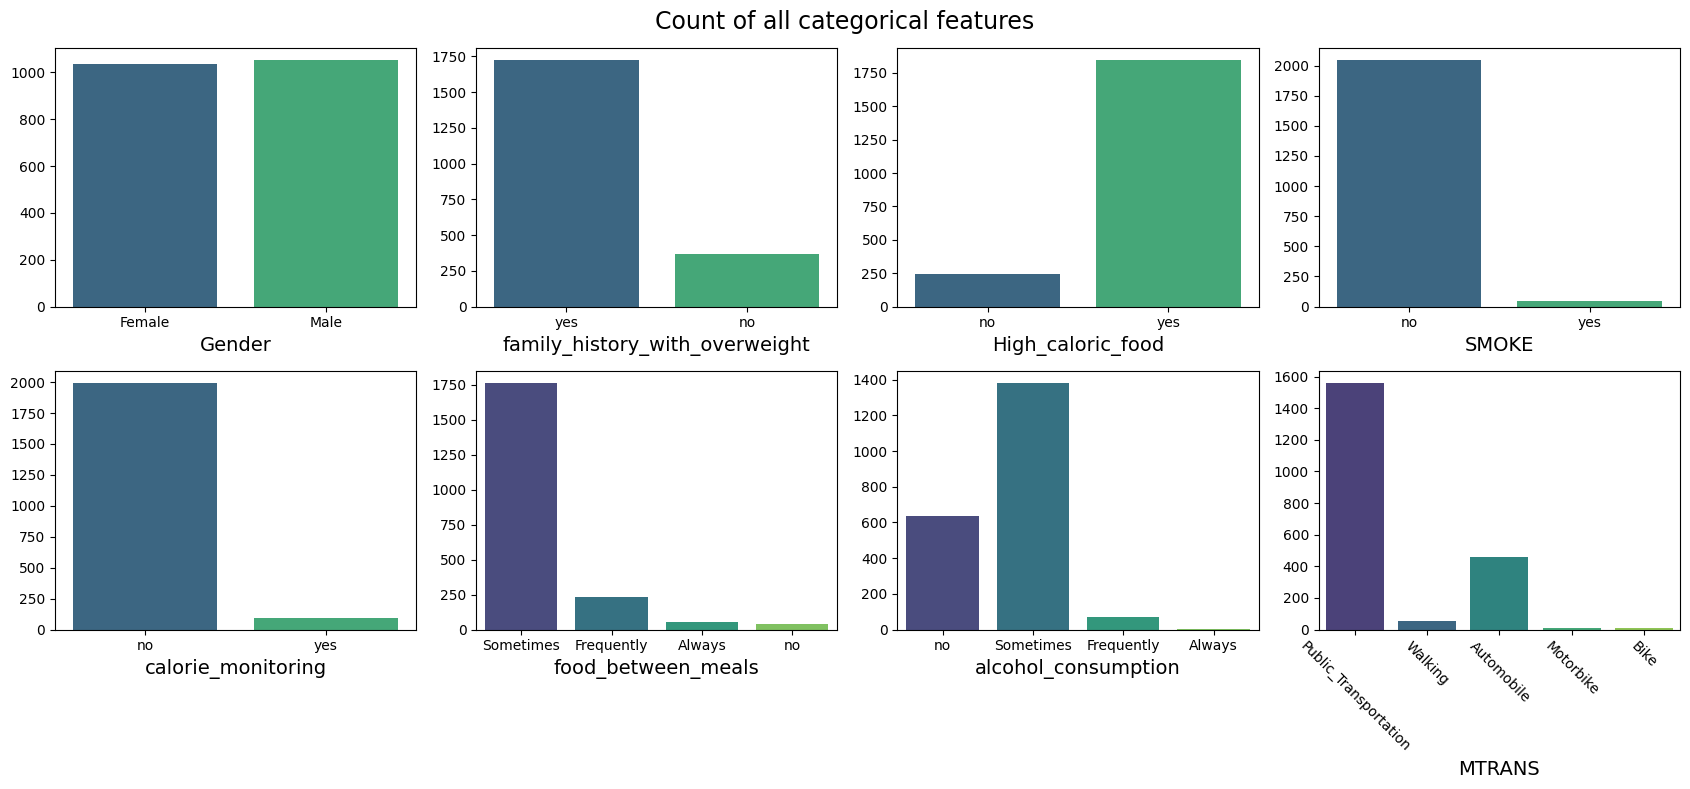

In [12]:
fig, ax = plt.subplots(2,4,figsize=(17,8))
ax=ax.flatten()
fig.suptitle("Count of all categorical features", fontsize = 17)

for i in range(len(categorical_features)):
    sb.countplot(data = df, x = categorical_features[i], palette = "viridis", ax=ax[i])
    ax[i].set_xlabel(categorical_features[i],fontsize = 14)
    ax[i].set_ylabel("")
ax[-1].tick_params(axis='x', rotation=-45)
    
plt.tight_layout()
plt.show()

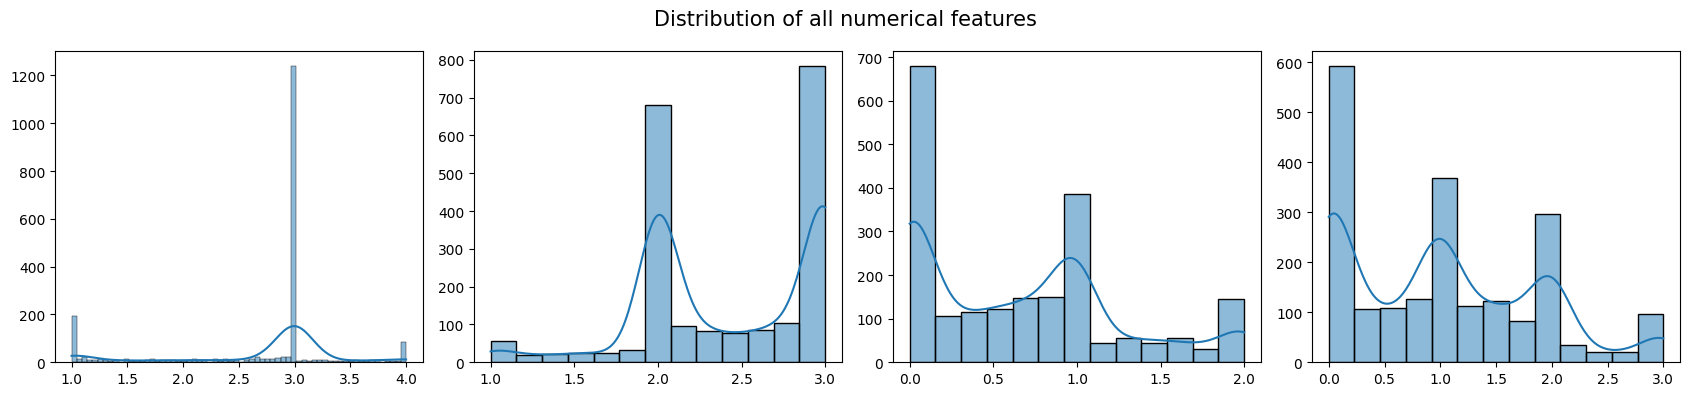

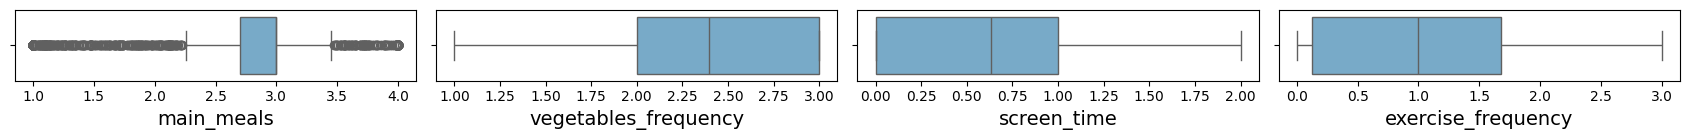

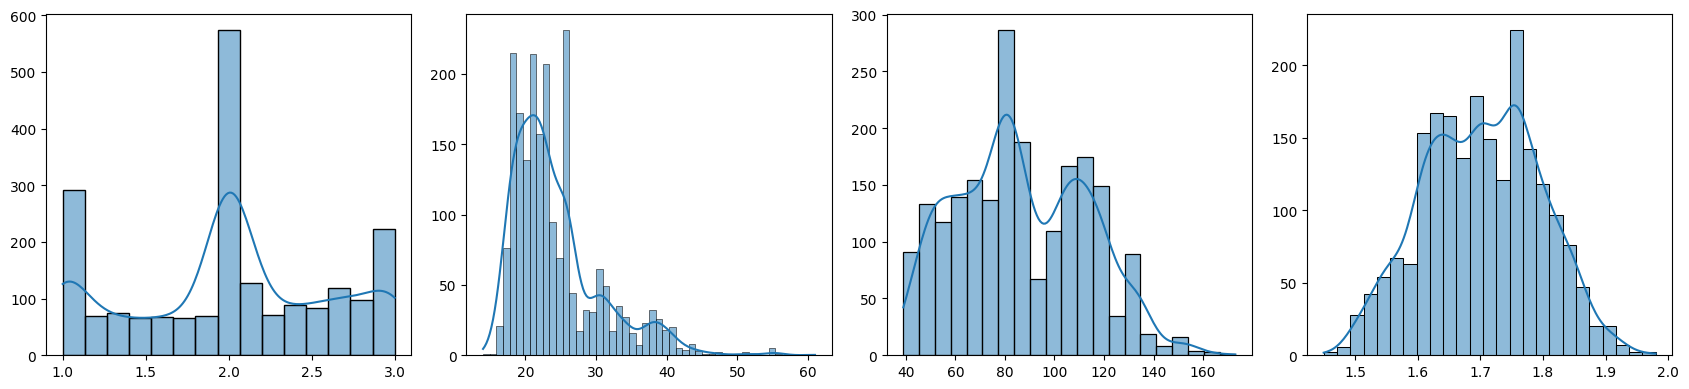

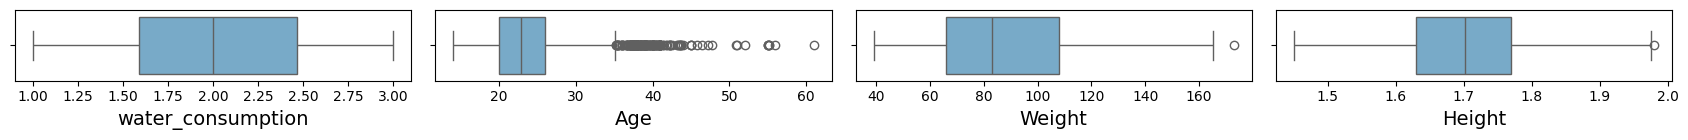

In [13]:
fig, ax = plt.subplots(1,4,figsize=(17,4))
ax=ax.flatten()
fig.suptitle("Distribution of all numerical features", fontsize = 15)

for i in range(4):
    sb.histplot(data = df, x = numerical_features[i], palette = "Blues", ax=ax[i], kde=True)
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")
    
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1,4,figsize=(17,1.5))
ax=ax.flatten()

for i in range(4):
    sb.boxplot(data = df, x = numerical_features[i], palette = "Blues", ax=ax[i])
    ax[i].set_xlabel(numerical_features[i],fontsize = 14)
    ax[i].set_ylabel("")
    
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1,4,figsize=(17,4))
ax=ax.flatten()

for i,j in zip(range(4,9),range(4)):
    sb.histplot(data = df, x = numerical_features[i], palette = "Blues", ax=ax[j], kde=True)
    ax[j].set_ylabel("")
    ax[j].set_xlabel("")
    
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1,4,figsize=(17,1.5))
ax=ax.flatten()

for i,j in zip(range(4,9),range(4)):
    sb.boxplot(data = df, x = numerical_features[i], palette = "Blues", ax=ax[j])
    ax[j].set_xlabel(numerical_features[i],fontsize = 14)
    ax[j].set_ylabel("")
    
plt.tight_layout()
plt.show()

In [14]:
columns_to_dummy = ["Gender","family_history_with_overweight","High_caloric_food","calorie_monitoring","SMOKE"]
columns_to_encode = ["food_between_meals", "alcohol_consumption"]
other_columns = ['Age', 'Height', 'Weight', 'vegetables_frequency', 'main_meals', 'water_consumption', 
                 'exercise_frequency', 'screen_time']

In [15]:
df1 = df.copy()
encoding = {"no":0, "Sometimes":1,"Frequently":2,"Always":3}

df1["food_between_meals"] = df["food_between_meals"].map(encoding)
df1["alcohol_consumption"] = df["alcohol_consumption"].map(encoding)
df1["healthy_transport"] = df["MTRANS"].apply(lambda x : 1 if x=="Public_Transportation" or x=="Walking" else 0)


In [16]:
df1 = df1.drop("MTRANS", axis=1)

In [17]:
df1.sample()

,Gender,Age,Height,Weight,family_history_with_overweight,High_caloric_food,vegetables_frequency,main_meals,food_between_meals,SMOKE,water_consumption,calorie_monitoring,exercise_frequency,screen_time,alcohol_consumption,NObeyesdad,healthy_transport
1994,Female,21.282238,1.748951,133.662583,yes,yes,3.0,3.0,1,no,2.247979,no,1.609938,0.849236,1,Obesity_Type_III,1


In [18]:
pd.get_dummies(df1[columns_to_dummy], drop_first=True)*1

,Gender_Male,family_history_with_overweight_yes,High_caloric_food_yes,calorie_monitoring_yes,SMOKE_yes
0,0,1,0,0,0
1,0,1,0,1,1
2,1,1,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
2106,0,1,1,0,0
2107,0,1,1,0,0
2108,0,1,1,0,0
2109,0,1,1,0,0


In [19]:
df_processed = pd.get_dummies(df1[columns_to_dummy], drop_first=True)*1
df_processed[columns_to_encode] = df1[columns_to_encode]
df_processed["healthy_transport"] = df1["healthy_transport"]
df_processed[other_columns] = df1[other_columns]
df_processed.sample()

,Gender_Male,family_history_with_overweight_yes,High_caloric_food_yes,calorie_monitoring_yes,SMOKE_yes,food_between_meals,alcohol_consumption,healthy_transport,Age,Height,Weight,vegetables_frequency,main_meals,water_consumption,exercise_frequency,screen_time
1116,1,1,1,0,0,1,1,1,30.079371,1.810616,92.860254,2.0,3.0,1.622638,0.033745,0.105895


In [20]:
from sklearn.preprocessing import StandardScaler

df_scaled = pd.DataFrame(data = StandardScaler().fit_transform(df_processed), columns = df_processed.columns)

df_scaled.shape

(2087, 16)

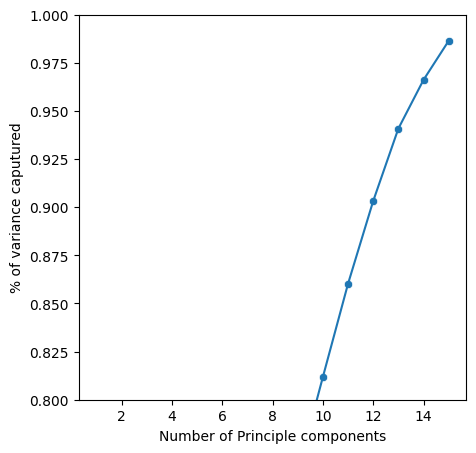

In [21]:
from sklearn.decomposition import PCA
variance_captured = list()
n = df_scaled.shape[1]
plt.figure(figsize=(5,5))
for i in range(1,n):
    pca = PCA(n_components=i)
    pca.fit(df_scaled)
    variance_captured.append(pca.explained_variance_ratio_.sum())
    
sb.lineplot( x =  range(1,n), y = variance_captured)
sb.scatterplot( x =  range(1,n), y = variance_captured)
plt.ylim(0.8, 1)
plt.xlabel("Number of Principle components")
plt.ylabel("% of variance caputured")
plt.show()

In [22]:
n=12
pca = PCA(n_components=n)
pca.fit(df_scaled)
pca_data = pca.transform(df_scaled)

for i in range(n):
    print("PCA",i+1,":",round(pca.explained_variance_ratio_[i]*100,2), "%")
print ("Total variance captured", round(pca.explained_variance_ratio_.sum()*100,2), "%")

PCA 1 : 16.25 %
PCA 2 : 11.64 %
PCA 3 : 9.85 %
PCA 4 : 8.53 %
PCA 5 : 7.02 %
PCA 6 : 6.33 %
PCA 7 : 6.06 %
PCA 8 : 5.41 %
PCA 9 : 5.17 %
PCA 10 : 4.93 %
PCA 11 : 4.84 %
PCA 12 : 4.3 %
Total variance captured 90.32 %


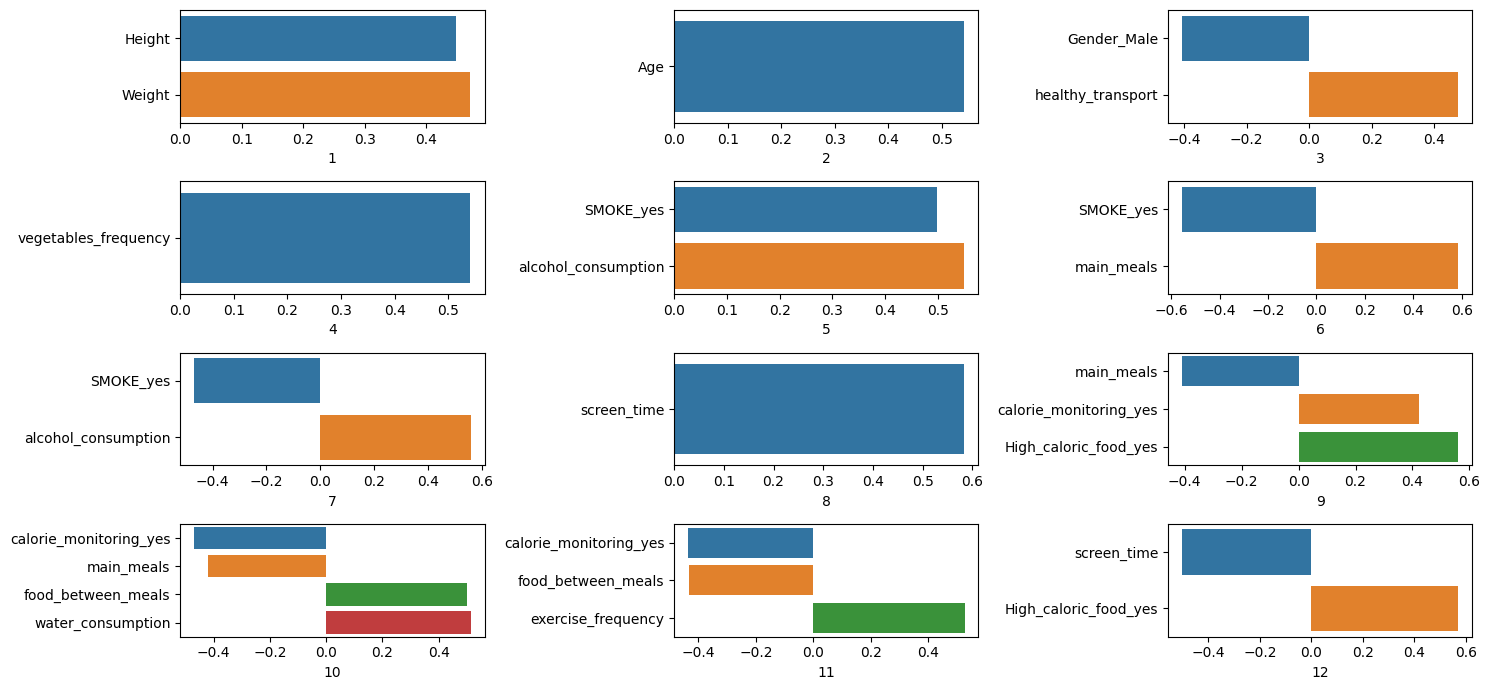

In [23]:
pca_imp = pd.DataFrame( data = pca.components_, columns = pca.feature_names_in_).transpose()

fig,ax = plt.subplots(4,3,figsize=(15,7))
ax=ax.flatten()

for i in range(n):
    sb.barplot(pca_imp[pca_imp.columns[i]][abs(pca_imp[pca_imp.columns[i]])>=0.40].sort_values(ascending=True), orient= "h", ax=ax[i], palette = "tab10")
    ax[i].set_xlabel(i+1)
plt.tight_layout()    
plt.show()

In [24]:
pca_df = pd.DataFrame( data =pca_data, 
                      columns = ["Body_dimension", 
                                 "Age", 
                                 "Female_healthy_transport",
                                 "Vegetables", 
                                 "Smoke and Alcohol", 
                                 "6","7","8","9","10","11","12" ])

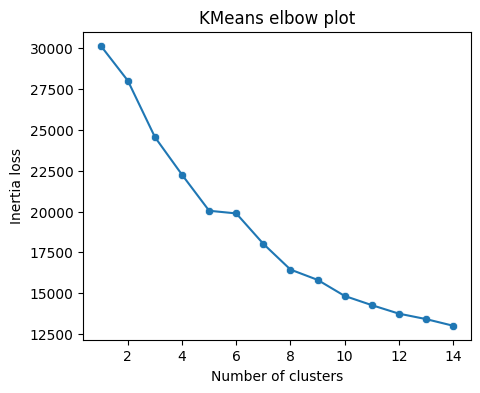

In [25]:
from sklearn.cluster import KMeans
loss = list()
plt.figure(figsize=(5,4))

for i in range(1,15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pca_df)
    loss.append(kmeans.inertia_)
    
sb.lineplot( x =  range(1,15), y = loss)
sb.scatterplot( x =  range(1,15), y = loss)

plt.title("KMeans elbow plot")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia loss")
plt.show()

In [26]:
n = 5
kmeans = KMeans(n_clusters= n)
kmeans.fit(pca_df)
kpred = kmeans.predict(pca_df)

k_result = pca_df.copy()
k_result["cluster"] = kpred

k_cluster_mean = k_result.groupby("cluster").mean(numeric_only=True).iloc[:,0:5].transpose()
k_cluster_mean.head()

cluster,0,1,2,3,4
Body_dimension,0.530237,-1.291503,1.050466,0.967634,-2.138316
Age,0.281537,0.370251,-0.956727,1.846641,-0.739894
Female_healthy_transport,1.836392,0.638922,-0.272519,-1.243687,-0.596175
Vegetables,0.753825,-1.084632,-0.396779,0.117729,0.663844
Smoke and Alcohol,0.083451,-0.505440,0.086612,-0.091123,0.256334


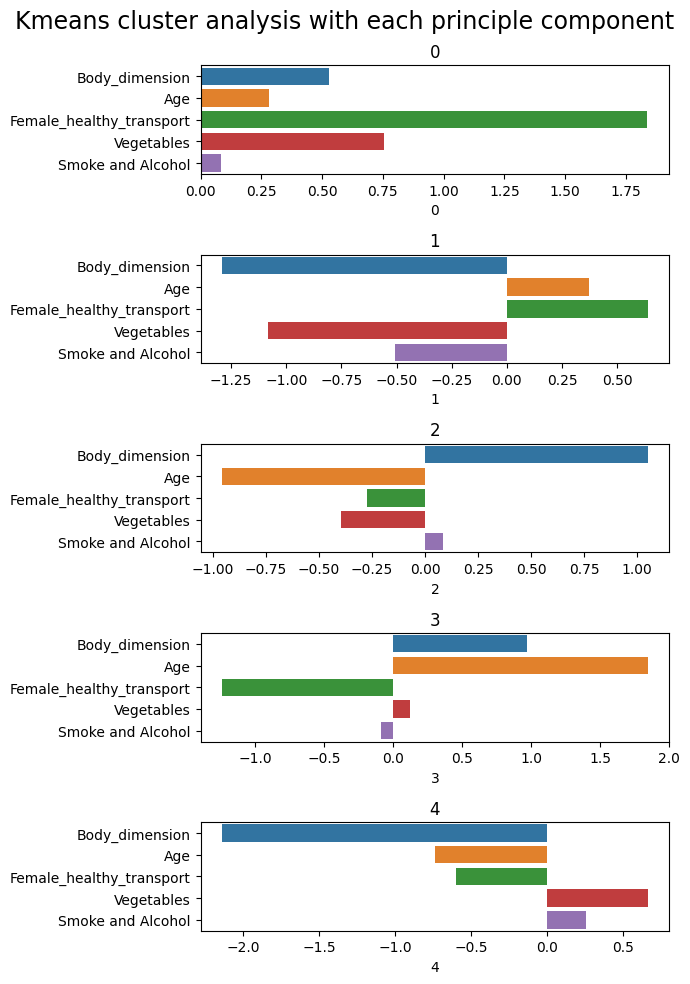

In [27]:
fig, ax = plt.subplots(n,1, figsize=(7,n*2))
ax = ax.flatten()
fig.suptitle("Kmeans cluster analysis with each principle component", fontsize = 17)

for i in range(n):
    sb.barplot(data = k_cluster_mean, x= k_cluster_mean.columns[i] , y= k_cluster_mean.index , palette = "tab10", ax=ax[i])
    ax[i].set_title(k_cluster_mean.columns[i])
    ax[i].set_ylabel("")

plt.tight_layout()
plt.show()  

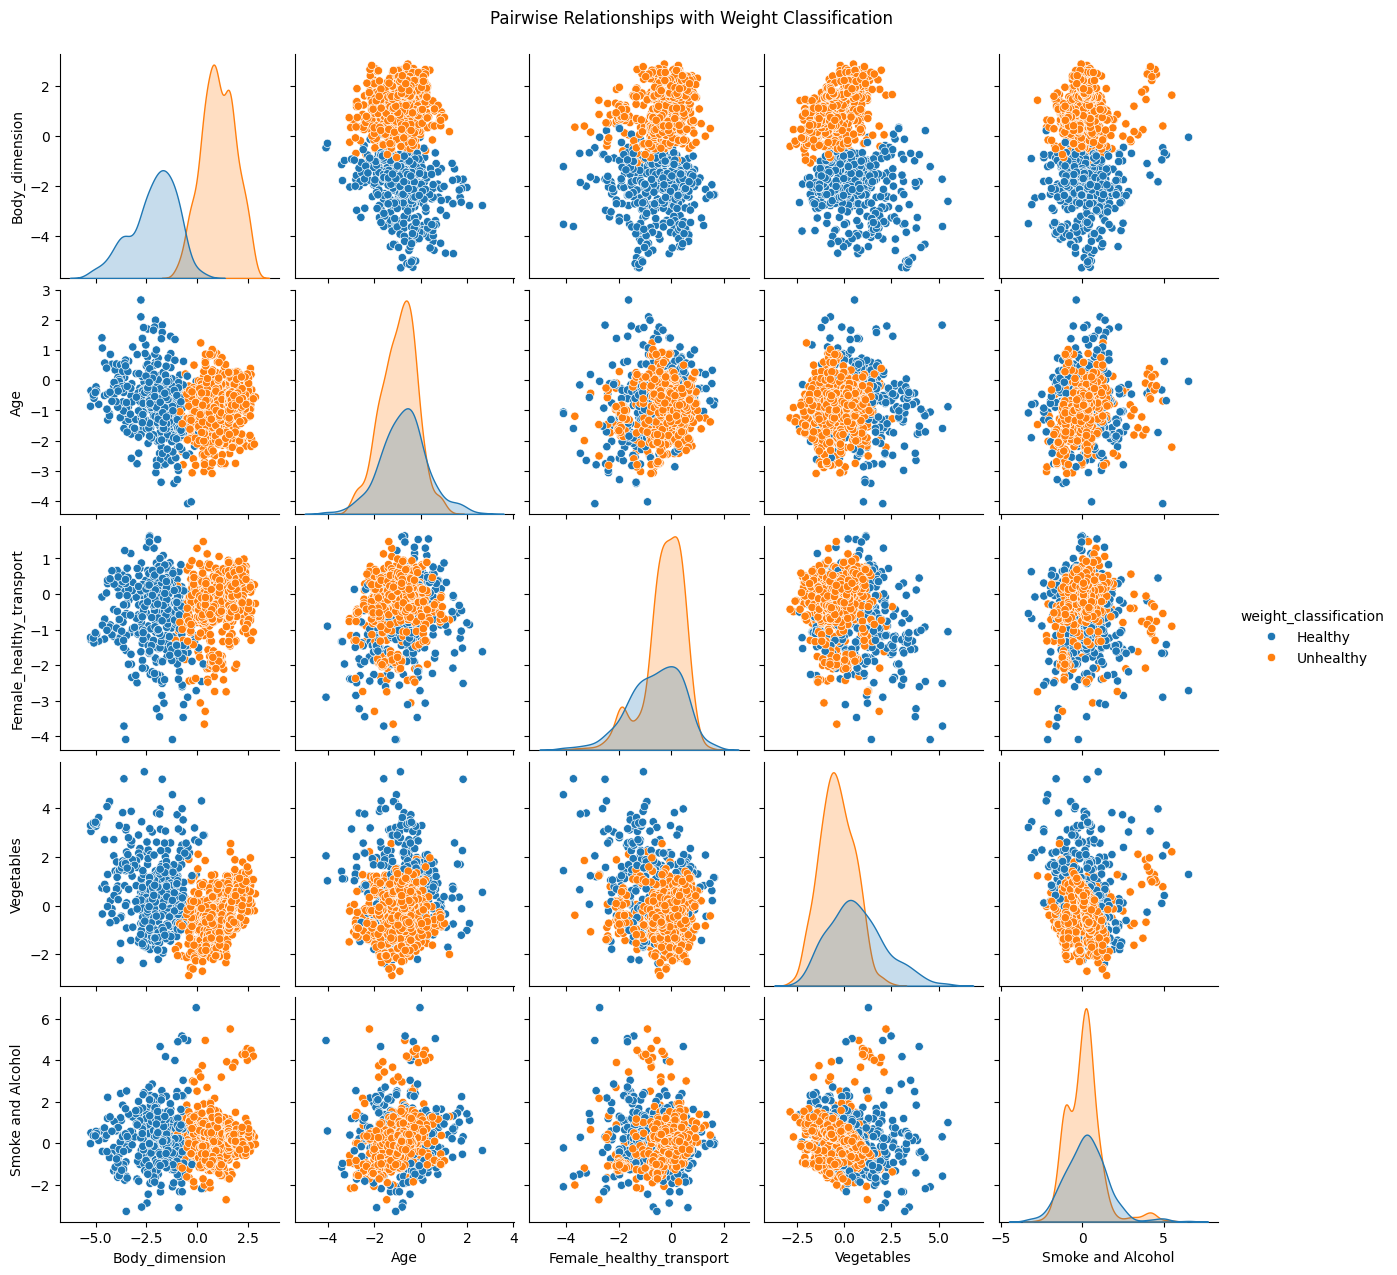

In [29]:
k_result["weight_classification"] = k_result["cluster"].map({2: "Unhealthy", 4: "Healthy"})
 
sb.pairplot(data = k_result, 
            vars= ['Body_dimension', 'Age', 'Female_healthy_transport', 'Vegetables','Smoke and Alcohol'], 
            hue = "weight_classification",
           palette = "tab10")

plt.suptitle("Pairwise Relationships with Weight Classification", y=1.02)
plt.show()

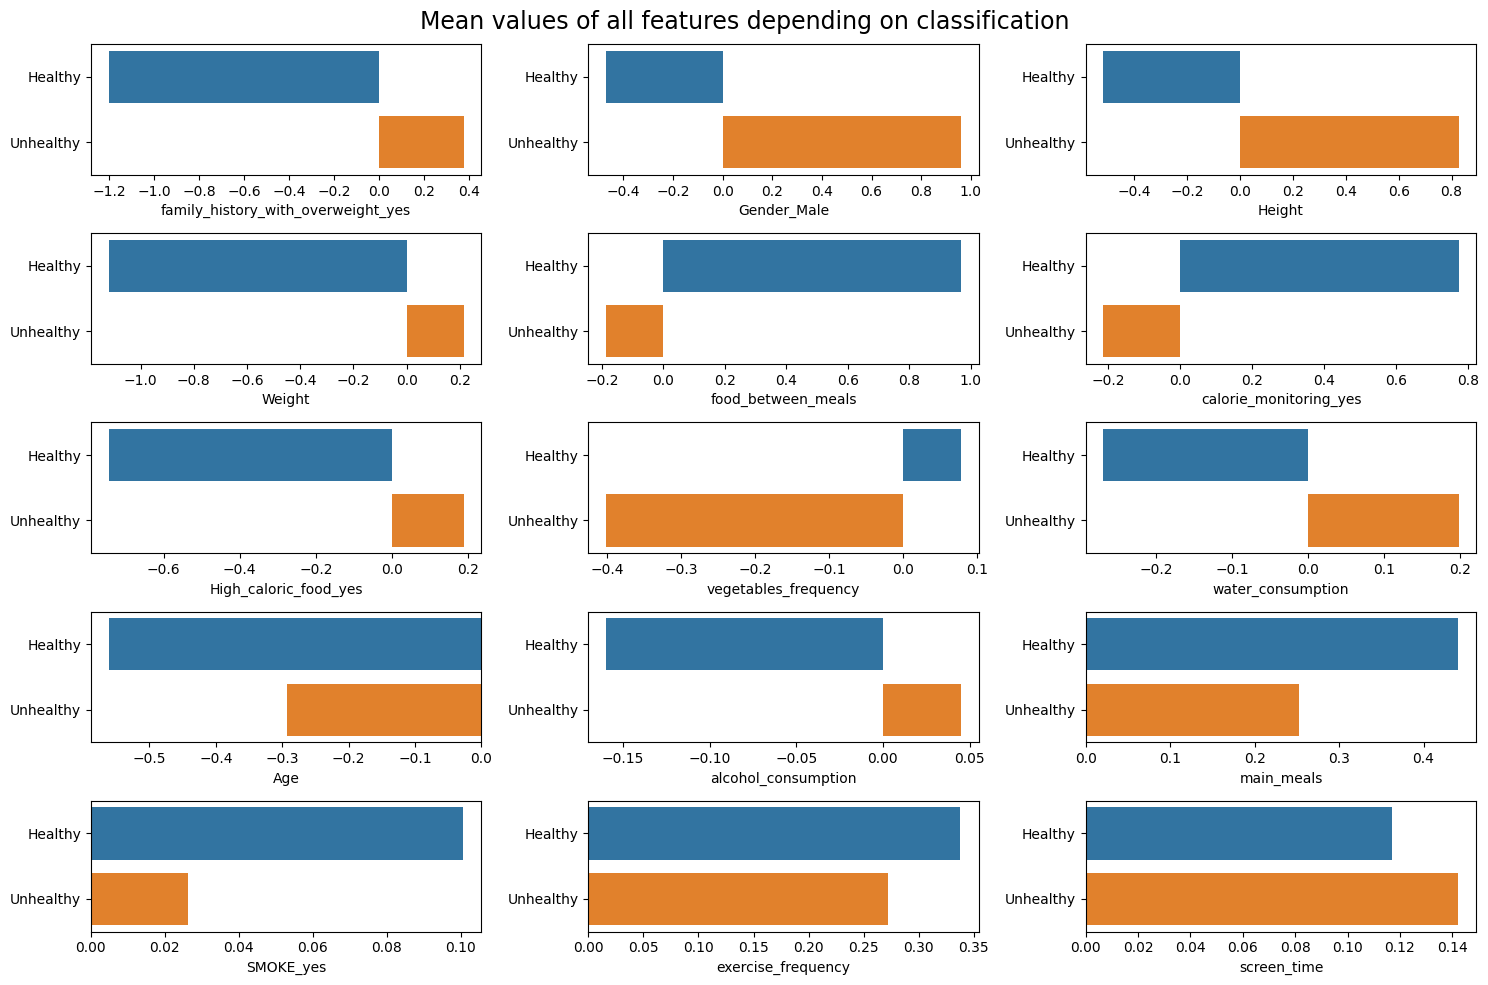

In [31]:
original_caled_data = df_scaled.copy()
original_caled_data["weight_classification"] = k_result["weight_classification"]

grouped_mean = original_caled_data.groupby("weight_classification").mean(numeric_only=True)
grouped_mean.loc["diff"] = abs(grouped_mean.loc["Unhealthy"] - grouped_mean.loc["Healthy"])
grouped_mean_sorted = grouped_mean.sort_values(by="diff",axis=1, ascending=False)

fig, ax = plt.subplots(5,3,figsize=(15,10))
ax=ax.flatten()
fig.suptitle("Mean values of all features depending on classification", fontsize=17)

for i in range(15):
    sb.barplot(x = grouped_mean_sorted[grouped_mean_sorted.columns[i]][:2],
               y = grouped_mean_sorted.index[:2], 
               ax=ax[i], palette = "tab10" )
    ax[i].set_title(None)
    ax[i].set_xlabel(grouped_mean_sorted.columns[i])
    ax[i].set_ylabel(None)
    
plt.tight_layout()    